In [122]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
X_train, y_train = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=6, random_state=11)

In [125]:
print(X_train)

[[-7.90664706e-01  5.85288689e+00]
 [-1.42278973e+01 -1.63273467e+01]
 [-7.02550174e+00 -1.91142706e+01]
 [-5.54723596e-01  5.73736868e-01]
 [-9.57083839e+00 -2.40273008e-01]
 [ 7.43746588e+00  3.04823550e+00]
 [-2.30052536e+00  1.14140272e+01]
 [-1.15747213e+01 -1.03937440e+01]
 [ 2.55774062e+00  1.37958294e+00]
 [-1.11517963e+01 -1.00409916e+01]
 [-6.44431400e+00 -1.15282834e+01]
 [-1.60535093e+00  8.13041943e+00]
 [-2.00097810e+00 -1.34659475e+01]
 [ 8.40562866e+00  6.22580441e+00]
 [ 5.49601367e+00  1.82514389e+00]
 [-2.17927845e+00 -3.49751328e+00]
 [-2.45244074e+00 -6.38120369e+00]
 [-1.19385803e+01 -1.73955755e+01]
 [ 2.36233434e+00  2.55012698e+00]
 [-4.61652357e+00 -1.19386845e+00]
 [ 1.34366291e+01  2.84032407e+00]
 [-3.53041243e+00  8.10242692e+00]
 [-1.06270904e+01 -9.89389062e+00]
 [-1.79169238e+00  6.71760966e+00]
 [ 6.88935126e+00  8.47810599e+00]
 [-9.37498909e+00 -6.58036367e+00]
 [-7.18392712e+00 -8.44391996e+00]
 [ 1.67766221e+00 -3.51484229e+00]
 [-1.64992716e+01 -1

In [126]:
df = pd.DataFrame(X_train, columns = ['x', 'y']).assign(label = y_train)

In [127]:
# df = pd.DataFrame(dict(x = X_train[:, 0], y = X_train[:, 1], label = y_train))

In [128]:
df.head()

,x,y,label
0,-0.790665,5.852887,1
1,-14.227897,-16.327347,0
2,-7.025502,-19.114271,0
3,-0.554724,0.573737,1
4,-9.570838,-0.240273,0


# Plotting

Text(0, 0.5, 'y_1')

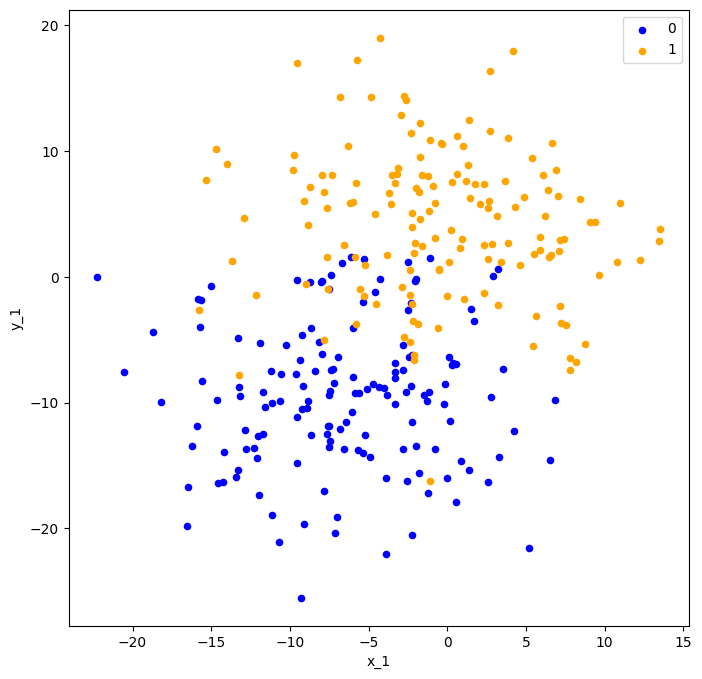

In [129]:
colors = {0: 'blue', 1: 'orange'}

fig, ax = plt.subplots(figsize = (8,8))
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

plt.xlabel('x_1')
plt.ylabel('y_1')

In [130]:
# import pandas as pd

# # Create a DataFrame
# df = pd.DataFrame({
#     'label': ['A', 'B', 'A', 'B'],
#     'x': [1, 2, 3, 4],
#     'y': [5, 6, 7, 8]
# })

# # Group by 'label'
# grouped = df.groupby('label')

# # Iterate over the groups
# for key, group in grouped:
#     print(f"Key: {key}")
#     print(f"Group:\n{group}\n")
#     print

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, train_size = 0.8, random_state = 0)

In [132]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [133]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

In [135]:
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [136]:
y_pred = knn.predict(x_test)

In [137]:
x_test

array([[-0.79649853, -0.86054923],
       [-0.26699408, -1.25232494],
       [ 0.23229813, -1.1953801 ],
       [ 1.00219673,  0.0349556 ],
       [-0.30370542, -0.73569422],
       [-0.62944592, -0.27530383],
       [ 1.83112267, -0.30183963],
       [-0.24770808, -1.09923957],
       [-1.37975152, -1.05707792],
       [-0.66427476,  0.2352948 ],
       [ 0.73932241,  0.96624535],
       [ 0.20586736, -0.10389964],
       [ 0.26884553,  1.32437601],
       [ 1.00234216,  0.34604808],
       [-1.04641345, -0.80426248],
       [ 1.59599221, -0.12324511],
       [-1.8220624 ,  0.08800772],
       [ 0.17610657,  0.12135363],
       [ 0.72948903, -1.40667845],
       [ 0.9307916 ,  1.54830985],
       [ 1.50860274,  0.46717311],
       [ 0.46901796,  1.44059575],
       [-1.87681295, -1.19848572],
       [-0.35583475, -0.16779254],
       [ 0.23635927,  0.26124233],
       [-0.36488266, -0.90009485],
       [ 0.87781212,  0.14141816],
       [ 0.10313553,  0.18693978],
       [ 0.54843448,

In [138]:
input = [[1.0, -.05]]
ss.transform(input)
knn.predict(input)

array([0])

In [139]:
knn.score(x_test, y_test)

0.7833333333333333

<Axes: >

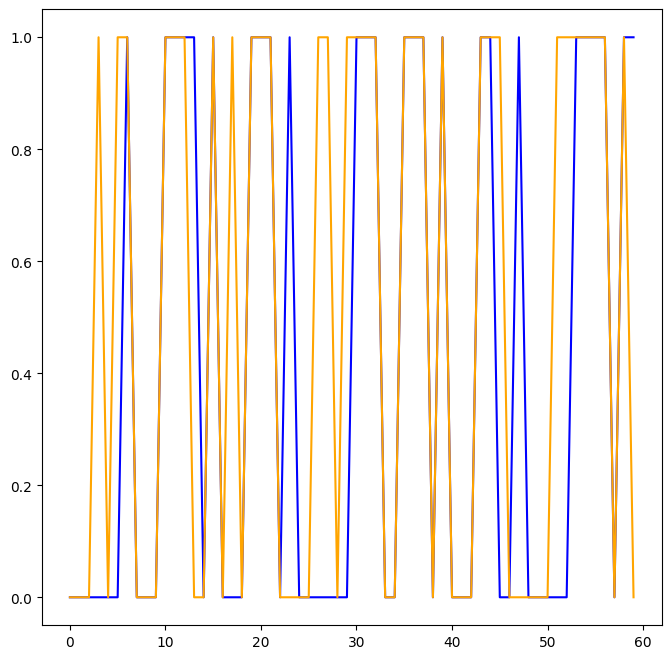

In [140]:
fig, ax = plt.subplots(figsize = (8, 8))

pd.Series(y_pred).plot(ax = ax, kind = 'line', color = 'blue', label = 'pred')
pd.Series(y_test).plot(ax = ax, kind = 'line', color = 'orange', label = 'actual')

In [141]:
data = pd.DataFrame(dict(x = y_test, y = y_pred))
data = data[data['x'] != data['y']]

In [142]:
data

,x,y
3,1,0
5,1,0
13,0,1
17,1,0
23,0,1
26,1,0
27,1,0
29,1,0
45,1,0
47,0,1


In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 9, 22]], dtype=int64)

KNN regression

In [144]:
from sklearn.datasets import make_regression
x_train, y_train = make_regression(n_samples = 300, n_features = 2, n_informative=2, noise = 5, bias = 30, random_state = 200)

In [145]:
df = pd.DataFrame(x_train, columns = ['x', 'y']).assign(label = y_train)

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size = 0.8, random_state = 0)

In [147]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 5, weights='distance')

In [148]:
x_test = ss.fit_transform(x_test)
x_train = ss.transform(x_train)

In [149]:
knr.fit(x_train, y_train)

KNeighborsRegressor(weights='distance')

In [150]:
y_pred = knr.predict(x_test)

In [151]:
y_pred

array([  89.82950308,   35.00835036,  -61.18649651,  -43.39338357,
        182.2865855 ,  135.82118452,   85.22694305,  109.04911128,
        203.47667199,  -87.84417865,  255.08491925,  -25.04305458,
         -4.64595793, -268.4229322 ,  -22.59865975,  243.56935958,
        -62.67256361,  183.74617659,   63.82156848,  130.23774886,
         -5.65479644,   51.79681487,  -23.69223729, -113.36349403,
         31.65260868,  100.47000989,   10.28369065,  153.19859363,
        -37.49014401,   20.83952299,  196.46484355,  310.17615892,
        105.66873607,   67.6628919 , -146.41369216, -122.75014297,
         74.51573452,   -7.87256453,  -39.58188787, -159.28974053,
        -69.45335765,  220.01942786,  -72.6216825 ,  -63.04400853,
        117.68616978,  219.75944097, -121.72215091,  -76.62718783,
        -36.84179533,   95.37642934,  107.48546258, -213.07603953,
        321.79388296,  242.33025739,  267.2905319 ,  -45.51289791,
        -34.83082744,  -11.83667178,  223.96392211,  105.92073

In [155]:
# df['y'] = df['y'].apply(lambda x: 0 if x <= 0 else 1)

In [158]:
knr.score(x_test, y_test)

0.981588126332967

In [ ]:
from sklearn.datasetsimport load_iris
iris = load_iris()

df= pd.DataFrame(iris.data, columns = iris.feature_names).assign(label = iris.target)